In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization,LeakyReLU,ReLU
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
test=pd.read_csv("D:/kannada-MNIst/Dig-MNIST.csv")

In [3]:
X_test=test.drop('label',axis=1)
Y_test=test["label"]

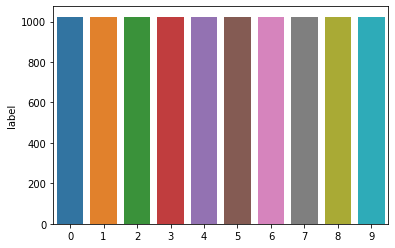

In [4]:
y=test.label.value_counts()
sns.barplot(y.index,y)

In [5]:
X_test=test/255

In [6]:
X_test=X_test.drop('label',axis=1)

In [7]:
X_test=X_test[0:2000]

In [8]:
Y_test=Y_test[0:2000]

In [9]:
X_test=X_test.values.reshape(-1,28,28,1)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_test,Y_test,random_state=42,test_size=0.15)

In [11]:
X_train.shape

(1700, 28, 28, 1)

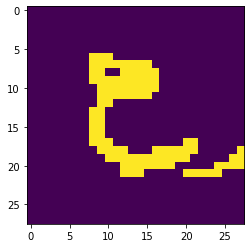

In [12]:
plt.imshow(X_test[144][:,:,0])


In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_1 = LabelEncoder()
y_train = labelencoder_y_1.fit_transform(y_train)

In [14]:
epochs=2

In [15]:
model=Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))



In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
history = model.fit(
      X_train,y_train,
      steps_per_epoch=100,
      epochs=epochs,
      validation_data=(X_test,y_test),
      validation_steps=50,  
      verbose=1)

Train on 1700 samples, validate on 300 samples
Epoch 1/2
100/100 [==============================] - 1199s 12s/step - loss: 0.0038 - sparse_categorical_accuracy: 0.9989 - val_loss: 0.0023 - val_sparse_categorical_accuracy: 48.3333
Epoch 2/2
100/100 [==============================] - 757s 8s/step - loss: 0.0013 - sparse_categorical_accuracy: 0.9996 - val_loss: 0.0028 - val_sparse_categorical_accuracy: 48.6667


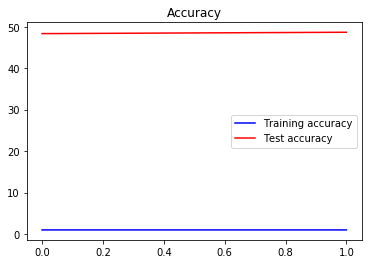

In [20]:
accuracy = history.history['sparse_categorical_accuracy']
val_accuracy = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Test accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

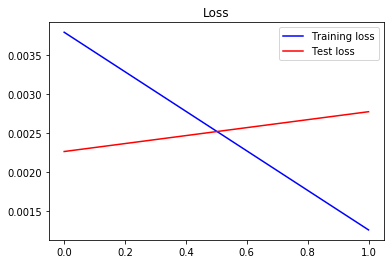

In [22]:
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Test loss')
plt.title('Loss')
plt.legend()
plt.show()

Text(0, 0.5, 'accuracy')

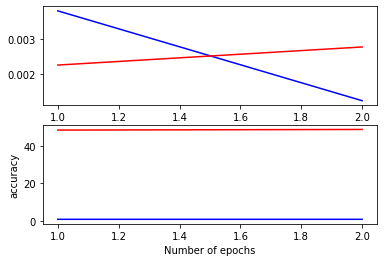

In [23]:
fig,ax=plt.subplots(2,1)
fig.set
x=range(1,1+2)
ax[0].plot(x,history.history['loss'],color='blue')
ax[0].plot(x,history.history['val_loss'],color='red')
ax[1].plot(x,history.history['sparse_categorical_accuracy'],color='blue')
ax[1].plot(x,history.history['val_sparse_categorical_accuracy'],color='red')

plt.xlabel('Number of epochs')
plt.ylabel('accuracy')